In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('placement.csv')

In [2]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

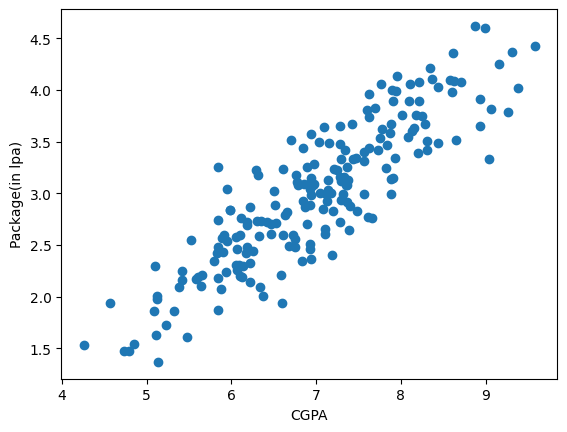

In [3]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [4]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [5]:

y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:

from sklearn.linear_model import LinearRegression

In [8]:

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

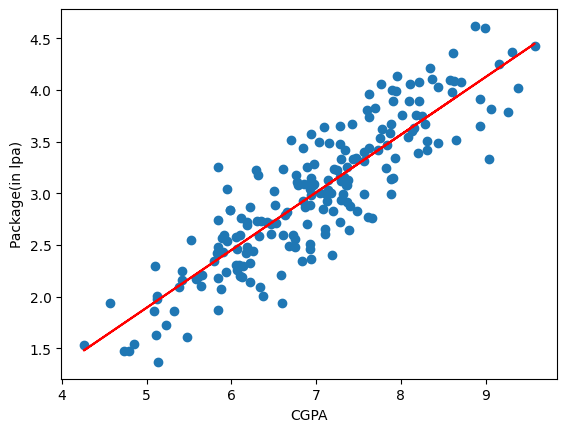

In [9]:

plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [16]:
y_pred=lr.predict(X_test)

In [15]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [17]:
print("MAE  ",mean_absolute_error(y_test.values,y_pred))

MAE   0.2884710931878175


In [18]:
print("MSE  ",mean_squared_error(y_test.values,y_pred))

MSE   0.12129235313495527


In [20]:
print("RMES  ",np.sqrt(mean_squared_error(y_test.values,y_pred)))

RMES   0.34827051717731616


In [24]:


print("R-2 Score  ",r2_score(y_test.values,y_pred))
r2=r2_score(y_test.values,y_pred)

R-2 Score   0.780730147510384


In [27]:
# Adjusted r_2 score
X_test.shape

(40, 1)

In [30]:
adjusted_r2=1-((1-r2)*(40-1)/(40-1-1))
adjusted_r2

0.7749598882343415

In [31]:
# here adjusted r2 is nearly same as r2 score

In [42]:
# now we are adding a irreelevant new col randomly values filled ,to check abot r2 and adjusted r2 score

In [33]:

new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.518226,3.26
1,5.12,0.790002,1.98
2,7.82,0.126468,3.25
3,7.42,0.614296,3.67
4,6.94,0.676430,3.57


Text(0, 0.5, 'Package(in lpa)')

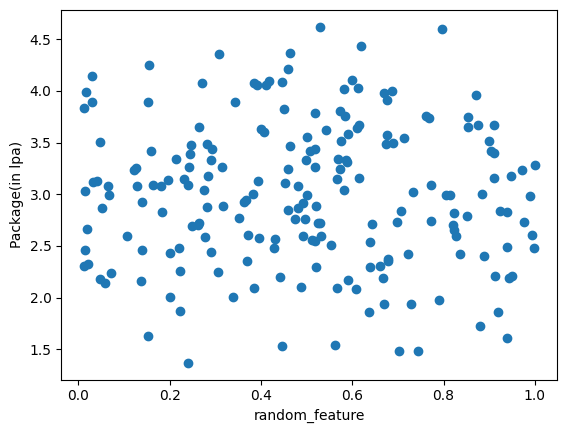

In [34]:

plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [35]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [36]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:

y_pred = lr.predict(X_test)

In [40]:

print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7807545798845134


In [41]:

1 - ((1-r2)*(40-1)/(40-1-2))

0.7689034760944871

In [43]:
# now we are adding a reelevant new col randomly values filled ,to check abot r2 and adjusted r2 score

In [44]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

Text(0, 0.5, 'Package(in lpa)')

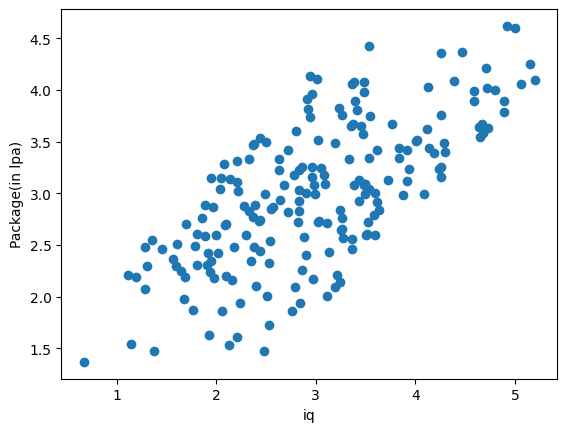

In [45]:

plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [46]:

np.random.randint(-100,100)

-43

In [47]:

X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]


In [48]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [49]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [50]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8252325418846636


In [51]:

1 - ((1-r2)*(40-1)/(40-1-2))

0.8157856522568075

In [ ]:
# apply there metrics on a regression project